# **The Python and MAD-X basics**

In [1]:
from IPython.display import FileLink

FileLink('../MainCommandsList.md')

/Users/nuria/Desktop/JUAS2025_LocalNuria/MainCommandsList.md

# **Tutorial 1: My first accelerator, a FODO cell**
<div style="font-size: 16px;">
The main goals of this tutorial are:
    
- to ensure that we all have a working enviroment,
    
- get familiar with the MAD-X pythonic approach,
    
- work on the optics of the simplest configuration we can design to get a net focusing effect of the beam in both transverse planes, a FODO cell.

  
<p>
<div style="display: flex; align-items: center;">

    
<div style="flex: 1; padding: 5px; margin-left: -0px;">
    
**FODO cell specifications:**<p>
- $L_{cell}$ = 100 m. <p>
- Two quadrupoles, one focusing (FQ) and another one defocusing (DQ).<p>
- $L_{q}$ = 1 m long.<p>
- The start of the sequence it is placed at the start of the first quadrupole.<p>
- f = 200 m (k x $L_{q}$ = 1/f).<p>

- Equal length drift spaces.<p>
 
</div>

<div style="flex: 1;">
    <img src="../Figures/Tutorial1_FODO.png" style="max-width: 90%;">
</div>


<div style="font-size: 16px;">
    
# **Questions:**
    
1. Run the provided FODO lattice in a MAD-X process.

2. Define a proton beam with a total energy, $E_{tot}$, of 450 GeV. Activate the sequence and compute the periodic linear optics functions with the Twiss command in MAD-X. Then, plot the $\beta$-functions. If you find a maximum $\beta$-function around 455 m, you succeeded!

3. Using the $\beta$-function plot obtained, can you estimate the phase advance of the cell? How does this value compare to the tune computed by MAD-X?
   
    $\mu (s)=\int_0^s \frac{1}{\beta (s)} ds$
    
4. Try to run the Twiss command with $E_{tot}$ = 0.7 GeV. What is the MAD-X error message?

5. Try to run the Twiss command with a focal length of 20 m. What is the MAD-X error message? Can you find a non-periodic solution for this lattice with initial $\beta_{x,y}$ = 1 m?

**SOLUTIONS**    
    
6. Coming back to the periodic solution found in question 2. Reduce the focusing strength of the quadrupoles by half. What is its effect on $\beta_{max}$, $\beta_{min}$, and $\Delta \mu$?

7. Compute the maximum beam size, $\sigma_{x,y}$, before and after reducing the strength of the quadrupoles for two beams, one of $E_{tot}$ = 450 GeV and the other of $E_{tot}$ = 7000 GeV. Assume a normalized horizontal and vertical emittance, $\epsilon_n^{x,y}$, of 3 mrad mm and use the following relation:

    $\sigma_{x,y}=\sqrt{\frac{\beta_{x,y}\epsilon_n^{x,y}}{\gamma}}$
    
    where $\gamma$ stands for the relativistic factor.

8. Using the nominal k, compute the required quadrupole magnetic field gradient and magnetic field at the poles using the following relations:
    
    $k[m^{-2}]=\frac{G[T/m]*0.3}{p[GeV/c]}$
    
    $B_{pole}[T]=G[T/m]*r_{in}[m] $
    
   Perform the calculation for two proton beams of 450 and 7000 GeV total energy, with a quadrupole inner aperture radius of 23 mm.
    
**SOLUTIONS**

# Python libraries 

In [2]:
#########################################
# Python libraries                      #
#########################################
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

#########################################
# Cpymad library                        #
#########################################
from cpymad.madx import Madx 

#########################################
# Additional library for plotting       #
#########################################
import sys
sys.path.append('../')
import lib_JUAS2025 as lib

#### More on the cpymad library: http://hibtc.github.io/cpymad/getting-started

#### Matplotlib setup:

In [3]:
# some setup for the plotting
params = {
    "legend.fontsize": "x-large",
    "figure.figsize": (15, 5),
    "axes.labelsize": "x-large",
    "axes.titlesize": "x-large",
    "xtick.labelsize": "x-large",
    "ytick.labelsize": "x-large",
}
plt.rcParams.update(params)

#### Pandas setup

In [4]:
# Set display options
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', 1000)  # Set width of the display

# Launching MAD-X

In [5]:
madx = Madx() 
# In order to see some MAD-X output in jupyter-notebook for some operating sysems the following command is needed:
# madx = Madx(stdout=True) 


  ++++++++++++++++++++++++++++++++++++++++++++
  +     MAD-X 5.09.00  (64 bit, Darwin)      +
  + Support: mad@cern.ch, http://cern.ch/mad +
  + Release   date: 2023.05.05               +
  + Execution date: 2025.01.14 14:45:49      +
  ++++++++++++++++++++++++++++++++++++++++++++


<div style="font-size: 16px;">
<div style="background-color: #ffff00; padding: 10px; border-radius: 5px;font-weight: bold;">
    Note that if MAD-X encounters an error while executing any command, the process will terminate, and you will need to relaunch MAD-X by executting the previous cell command!
</div>

# Question 1

#### **Run the provided FODO lattice in a MAD-X process.**

In [6]:
madx.call("Tutorial1.madx")

! FODO lattice MAD-X statements definition

! *********************************************************************

! Definition of parameters

! *********************************************************************



l_cell=100;

quadrupolelength=1;

f=200;

myk:=1/f/quadrupolelength;



! *********************************************************************

! Definition of magnets

! ********************************************************************* 



qf: quadrupole, l=quadrupolelength, k1:=myk;

qd: quadrupole, l=quadrupolelength, k1:=-myk;





! *********************************************************************

! Definition of sequence

! *********************************************************************



myCell:sequence, refer=entry, l=l_cell;

quadrupole1: qf, at=0;

marker1: marker, at=25;

quadrupole2: qd, at=50;

marker2: marker, at=75;

endsequence;



# Question 2

#### **Define a proton beam with a total energy, $E_{tot}$, of 450 GeV. Activate the sequence and compute the periodic linear optics functions with the Twiss command in MAD-X. Then, plot the $\beta$-functions. If you find a maximum $\beta$-function around 455 m, you succeeded!**

In [7]:
myString='''

! *********************************************************************
! Definition of beam
! *********************************************************************

beam, particle=proton, energy=450;

! *********************************************************************
! Use of the sequence
! *********************************************************************

use, sequence=myCell;

! *********************************************************************
! TWISS
! *********************************************************************

select, flag=twiss, column=name, keyword,s,betx,alfx,mux,bety,alfy,muy;
twiss;

'''
madx.input(myString)

enter Twiss module
  
iteration:   1 error:   0.000000E+00 deltap:   0.000000E+00
orbit:   0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00

++++++ table: summ

            length             orbit5               alfa            gammatr 
               100                 -0                  0                  0 

                q1                dq1            betxmax              dxmax 
     0.03962484409     -0.03983087925        455.4659201                  0 

             dxrms             xcomax             xcorms                 q2 
                 0                  0                  0      0.03962484409 

               dq2            betymax              dymax              dyrms 
    -0.03983087925        455.4659201                  0                  0 

            ycomax             ycorms             deltap            synch_1 
                 0                  0                  0                  0 

           synch_2            

True

<div style="font-size: 16px;">
<div style="background-color: #ffff00; padding: 10px; border-radius: 5px;font-weight: bold;">
    The maximum $\beta$-function is 455.47 m!
</div>

#### In the following, we are going to see how to access the MAD-X output data with python-cpymad functions and plot results with the matplotlib library

#### First we can check the list of existing output table names

In [37]:
print(list(madx.table))

['summ', 'twiss']


#### It is also possible, by using a cpymad method, to access the global parameters defined:

In [10]:
madx.globals

{'twiss_tol': 1e-06, 'l_cell': 100.0, 'quadrupolelength': 1.0, 'f': 200.0, 'myk': '1/f/quadrupolelength'}

In [38]:
madx.beam

beam, particle=proton, sequence=default_beam, bunched=true, radiate=false, mass=0.93827208816, charge=1.0, energy=450.0, pc=449.99902182725754, gamma=479.6050161552533, beta=0.9999978262827945, brho=1501.0351655586262, ex=1.0, exn=479.60397362957787, ey=1.0, eyn=479.60397362957787, et=0.001, sigt=1.0, sige=0.001, kbunch=1.0, npart=1.0, bcurrent=4.803183830975509e-13, freq0=2.99791806335976, circ=100.0, dtbyds=0.0, deltap=0.0, alfa=4.3474296860253165e-06, u0=0.0, qs=0.0, arad=1.5346982663445394e-18, bv=1.0, pdamp={1.0,1.0,2.0}, n1min=-1.0;

#### And save the data in a pandas dataframe 

In [11]:
myDF=madx.table.twiss.dframe()

In [12]:
myDF

name     keyword      s        betx      alfx       mux        bety      alfy       muy    x   px    y   py    t   pt   dx  dpx   dy  dpy   wx  phix  dmux   wy  phiy  dmuy  ddx  ddpx  ddy  ddpy  r11  r12  r21  r22  energy     l  angle  k0l  k0sl    k1l  k1sl  k2l  k2sl  k3l  k3sl  k4l  k4sl  k5l  k5sl  k6l  k6sl  k7l  k7sl  k8l  k8sl  k9l  k9sl  k10l  k10sl  k11l  k11sl  k12l  k12sl  k13l  k13sl  k14l  k14sl  k15l  k15sl  k16l  k16sl  k17l  k17sl  k18l  k18sl  k19l  k19sl  k20l  k20sl  ksi  hkick  vkick  tilt   e1   e2   h1   h2  hgap  fint  fintx  volt  lag  freq  harmon  slot_id  assembly_id  mech_sep  v_pos  bbcharge  xma  yma  sigx  sigy  lrad  parent comments  re11  re12  re13  re14  re15  re16  re21  re22  re23  re24  re25  re26  re31  re32  re33  re34  re35  re36  re41  re42  re43  re44  re45  re46  re51  re52  re53  re54  re55  re56  re61  re62  re63  re64  re65  re66  kmax  kmin  calib  polarity  alfa  beta11  beta12  beta13  beta21  beta22  beta23  \
#s           mycell$start:1      marker    0.0  455.465920 -1.138043  0.000000  356.036637  0.891126  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0   0.0   0.0  0.0   0.0  0.0   0.0  0.0  0.0  0.0  0.0   450.0   0.0    0.0  0.0   0.0  0.000   0.0  0.0   0.0  0.0   0.0  0.0   0.0  0.0   0.0  0.0   0.0  0.0   0.0  0.0   0.0  0.0   0.0   0.0    0.0   0.0    0.0   0.0    0.0   0.0    0.0   0.0    0.0   0.0    0.0   0.0    0.0   0.0    0.0   0.0    0.0   0.0    0.0   0.0    0.0  0.0    0.0    0.0   0.0  0.0  0.0  0.0  0.0   0.0   0.0    0.0   0.0  0.0   0.0     0.0      0.0          0.0       0.0    0.0       0.0  0.0  0.0   0.0   0.0   0.0  marker            0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0       0.0   0.0     0.0     0.0     0.0     0.0     0.0     0.0   
quadrupole1   quadrupole1:1  quadrupole    1.0  455.465920  1.138043  0.000349  356.036637 -0.891126  0.000447  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0   0.0   0.0  0.0   0.0  0.0   0.0 -0.0 -0.0 -0.0 -0.0   450.0   1.0    0.0  0.0   0.0  0.005   0.0  0.0   0.0  0.0   0.0  0.0   0.0  0.0   0.0  0.0   0.0  0.0   0.0  0.0   0.0  0.0   0.0   0.0    0.0   0.0    0.0   0.0    0.0   0.0    0.0   0.0    0.0   0.0    0.0   0.0    0.0   0.0    0.0   0.0    0.0   0.0    0.0   0.0    0.0  0.0    0.0    0.0   0.0  0.0  0.0  0.0  0.0   0.0   0.0    0.0   0.0  0.0   0.0     0.0      0.0          0.0       0.0    0.0       0.0  0.0  0.0   0.0   0.0   0.0      qf            0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0       0.0   0.0     0.0     0.0     0.0     0.0     0.0     0.0   
drift_0[0]        drift_0:0       drift   25.0  403.742399  1.017104  0.009261  401.713230 -1.012065  0.010554  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0   0.0   0.0  0.0   0.0  0.0   0.0 -0.0 -0.0 -0.0 -0.0   450.0  24.0    0.0  0.0   0.0  0.000   0.0  0.0   0.0  0.0   0.0  0.0   0.0  0.0   0.0  0.0   0.0  0.0   0.0  0.0   0.0  0.0   0.0   0.0    0.0   0.0    0.0   0.0    0.0   0.0    0.0   0.0    0.0   0.0    0.0   0.0    0.0   0.0    0.0   0.0    0.0   0.0    0.0   0.0    0.0  0.0    0.0    0.0   0.0  0.0  0.0  0.0  0.0   0.0   0.0    0.0   0.0  0.0   0.0     0.0      0.0          0.0       0.0    0.0       0.0  0.0  0.0   0.0   0.0   0.0   drift            0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0       0.0   0.0     0.0     0.0     0.0     0.0     0.0     0.0   
marker1           marker1:1    

#### We can select the data of interest as follows:

In [13]:
myDF[['name','keyword','s','betx','bety','alfx','alfy','mux','muy','dx','dy','x','y']]

name     keyword      s        betx        bety      alfx      alfy       mux       muy   dx   dy    x    y
#s           mycell$start:1      marker    0.0  455.465920  356.036637 -1.138043  0.891126  0.000000  0.000000  0.0  0.0  0.0  0.0
quadrupole1   quadrupole1:1  quadrupole    1.0  455.465920  356.036637  1.138043 -0.891126  0.000349  0.000447  0.0  0.0  0.0  0.0
drift_0[0]        drift_0:0       drift   25.0  403.742399  401.713230  1.017104 -1.012065  0.009261  0.010554  0.0  0.0  0.0  0.0
marker1           marker1:1      marker   25.0  403.742399  401.713230  1.017104 -1.012065  0.009261  0.010554  0.0  0.0  0.0  0.0
drift_1[0]        drift_1:0       drift   50.0  356.036637  455.465920  0.891126 -1.138043  0.019763  0.019862  0.0  0.0  0.0  0.0
quadrupole2   quadrupole2:1  quadrupole   51.0  356.036637  455.465920 -0.891126  1.138043  0.020211  0.020211  0.0  0.0  0.0  0.0
drift_2[0]        drift_2:0       drift   75.0  401.713230  403.742399 -1.012065  1.017104  0.030318  0.029123  0.0  0.0  0.0  0.0
marker2           marker2:1      marker   75.0  401.713230  403.742399 -1.012065  1.017104  0.030318  0.029123  0.0  0.0  0.0  0.0
drift_3[0]        drift_3:0       drift  100.0  455.465920  356.036637 -1.138043  0.891126  0.039625  0.039625  0.0  0.0  0.0  0.0
#e             mycell$end:1      marker  100.0  455.465920  356.036637 -1.138043  0.891126  0.039625  0.039625  0.0  0.0  0.0  0.0

#### Some examples to print some desired values from the output tables are given below

#### **Example 1:**

In [17]:
# Find the maximum value in the "betx" column of the DataFrame myDF
betxmax = max(myDF["betx"])
# Print a message indicating the maximum horizontal betamax value
print("Horizontal betamax")
# Print the maximum value found in the "betx" column
print(betxmax)

# Find the maximum value in the "bety" column of the DataFrame myDF
betymax = max(myDF["bety"])
# Print a message indicating the maximum vertical betamax value
print("Vertical betamax")
# Print the maximum value found in the "bety" column
print(betymax)

Horizontal betamax
455.46592013756947
Vertical betamax
455.4659201375694


#### Next, two examples on how to plot data from the created pandas dataframes are shown

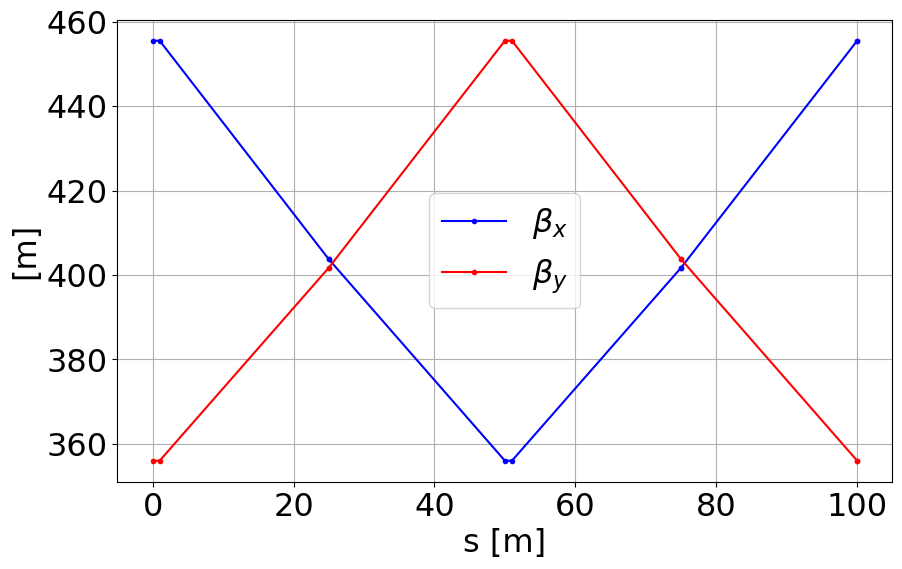

In [18]:
# Create a new figure with a specified size of 10 inches by 6 inches
fig = plt.figure(figsize=(10,6))

# Update the default font size for the plots
plt.rcParams.update({'font.size': 16})

# Plot the beta_x values against s with blue dots and a solid line, and label it
plt.plot(myDF['s'], myDF['betx'], '.-b', label='$\\beta_x$')

# Plot the beta_y values against s with red dots and a solid line, and label it
plt.plot(myDF['s'], myDF['bety'], '.-r', label='$\\beta_y$')

# Set the x-axis label to 's [m]'
plt.xlabel('s [m]')

# Set the y-axis label to '[m]'
plt.ylabel('[m]')

# Add a legend to the plot, placing it in the best location
plt.legend(loc='best')

# Enable the grid on the plot for better readability
plt.grid()

#### In the second example the magnetic lattice of the cell is added on a top plot by using the lib_JUAS2025 library

In [19]:
lib.plot_layout(myDF)

/Users/nuria/Desktop/JUAS2025_LocalNuria/Tutorial1_Solutions/../lib_JUAS2025.py:70: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax2.set_ylim(-np.max(abs(myDF.k0l)),np.max(abs(myDF.k0l)))


# Question 3

#### **Using the $\beta$-function plot obtained, can you estimate the phase advance of the cell? How does this value compare to the tune computed by MAD-X?**
   
$\mu (s)=\int_0^s \frac{1}{\beta (s)} ds$

#### A very basic approximation to solve the above integral is considering a constant beta:

In [20]:
# Calculate the mean of the 'betx' column in the DataFrame 'myDF'
# by taking the average of the maximum and minimum values in that column
betxmean = (max(myDF["betx"]) + min(myDF["betx"])) / 2

In [21]:
1/betxmean*100 #rad

0.24645640149799064

#### Remember the phase advance in MAD-X is given in units of [2$\pi$], therefore in order to compare with MAD-X output you need to divide by 2*pi:

In [22]:
1/betxmean*100/2/np.pi # in units of [2*pi]

0.03922475455504601

#### Computing the numerical integral using the np.trapz method that integrates along a given axis using the composite trapezoidal rule

In [23]:
np.trapz(1/myDF['betx'],myDF['s'])/2/np.pi

0.03967406554685665

#### Values from MAD-X Twiss commands

In [24]:
# Access the last row of the DataFrame 'myDF'
# and retrieve the value in the 'mux' column for that row
myDF.iloc[-1]['mux']

0.039624844085338874

#### And how this compares with the tune?

$Q=\frac{\Delta \mu}{2\pi}$

<div style="font-size: 16px;">
<div style="background-color: #ffff00; padding: 10px; border-radius: 5px;font-weight: bold;">
    Therefore, the obtained values directly correspond to the tune values, as in MAD-X, the phase advance is given in units of [2$\pi$].
</div>

# Question 4

#### **Try to run the twiss command with $E_{tot}$ = 0.7 GeV. What is the MAD-X error message?**

In [25]:
myString='''
beam, particle=proton, energy=0.7;
'''
madx.input(myString);

+=+=+= fatal: energy must be > mass


RuntimeError: MAD-X has stopped working!

<div style="font-size: 16px;">
<div style="background-color: #ffff00; padding: 10px; border-radius: 5px;font-weight: bold;">
    There is an error due to the fact that the energy given is lower than the proton rest mass.
</div>

<div style="font-size: 16px;">
<div style="background-color: #ffe5e5; padding: 10px; border-radius: 5px;font-weight: bold;">
    Because the MADX process has crashed in the previous cell we need to instanciate another MADX process.
</div>


# Question 5

#### **Try to run the Twiss command with a focal length of 20 m. What is the MAD-X error message? Can you find a non-periodic solution for this lattice?**

In [26]:
madx=Madx()


  ++++++++++++++++++++++++++++++++++++++++++++
  +     MAD-X 5.09.00  (64 bit, Darwin)      +
  + Support: mad@cern.ch, http://cern.ch/mad +
  + Release   date: 2023.05.05               +
  + Execution date: 2025.01.13 13:09:32      +
  ++++++++++++++++++++++++++++++++++++++++++++


In [27]:
madx.call("Tutorial1.madx")

! FODO lattice MAD-X statements definition

! *********************************************************************

! Definition of parameters

! *********************************************************************



l_cell=100;

quadrupolelength=1;

f=200;

myk:=1/f/quadrupolelength;



! *********************************************************************

! Definition of magnets

! ********************************************************************* 



qf: quadrupole, l=quadrupolelength, k1:=myk;

qd: quadrupole, l=quadrupolelength, k1:=-myk;





! *********************************************************************

! Definition of sequence

! *********************************************************************



myCell:sequence, refer=entry, l=l_cell;

quadrupole1: qf, at=0;

marker1: marker, at=25;

quadrupole2: qd, at=50;

marker2: marker, at=75;

endsequence;



In [28]:
# Define the commands as a multi-line string
myString = '''
f=20;
beam, particle = proton, energy = 450;  
use, sequence = myCell;  
twiss;  
'''

# Send the string of commands to MADX
madx.input(myString)

++++++ info: f redefined
enter Twiss module
  
iteration:   1 error:   0.000000E+00 deltap:   0.000000E+00
orbit:   0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00
++++++ warning: TWCLORB:  Horizontal plane might be unstable More information with the debug flag on.                                                                                                                                                                               
++++++ warning: TWCLORB:  Vertical plane might be unstable More information with the debug flag on.                                                                                                                                                                                 
++++++ warning: TWCPIN:  Both modes are unstable for delta(p)/p =     0.000000: cosmux =    -2.083249, cosmuy =    -2.083249                                                   
++++++ warning: Twiss failed:  MAD-X continues


++++++ Error: seterrorflag : Errorcode: 1   Reported from pro_twiss:
++++++ Error: seterrorflag : Description: TWISS failed


False

<div style="font-size: 16px;">
<div style="background-color: #ffff00; padding: 10px; border-radius: 5px;font-weight: bold;">
    INTERPRETATION: The cell is unstable due to the fact that **the focal length is too short**. The stability condition is not satisfied.<p>
    |Trace(M)|< 2; -1 <= cos $\mu$ <= 1. In the thin lens approximation f > Lcell/4.
</div>

#### **Can you find a non-periodic solution for this lattice with initial $\beta_{x,y}$ = 1 m?**

In [40]:
# Initialize the Madx object with stdout enabled for output
madx = Madx(stdout=True)

# Call the MAD-X script 'Tutorial1.madx' to set up the environment
madx.call('Tutorial1.madx')

# Set the global variable 'f' to 20, which may represent a frequency or similar parameter
madx.globals.f = 20

# Define the commands for the beam and sequence in a multi-line string format
myString = '''
beam, particle = proton, energy = 2;  
use, sequence = myCell; 
twiss, betx=1, bety=1;
'''
madx.input(myString)

# Perform a twiss analysis on the specified sequence 'myCell' with given beta values
#twiss = madx.twiss(sequence='myCell', betx=1, bety=1)

twiss=madx.table.twiss.dframe()

# Create a figure for plotting the results
fig = plt.figure(figsize=(10, 6))
plt.plot(twiss.s, twiss.betx, '.-b', label='$\\beta_x$')
plt.plot(twiss.s, twiss.bety, '.-r', label='$\\beta_y$')
plt.xlabel('s [m]')
plt.ylabel('[m]')
plt.legend(loc='best')
plt.grid()


  ++++++++++++++++++++++++++++++++++++++++++++
  +     MAD-X 5.09.00  (64 bit, Darwin)      +
  + Support: mad@cern.ch, http://cern.ch/mad +
  + Release   date: 2023.05.05               +
  + Execution date: 2025.01.14 13:36:08      +
  ++++++++++++++++++++++++++++++++++++++++++++
! FODO lattice MAD-X statements definition

! *********************************************************************

! Definition of parameters

! *********************************************************************



l_cell=100;

quadrupolelength=1;

f=200;

myk:=1/f/quadrupolelength;



! *********************************************************************

! Definition of magnets

! ********************************************************************* 



qf: quadrupole, l=quadrupolelength, k1:=myk;

qd: quadrupole, l=quadrupolelength, k1:=-myk;





! *********************************************************************

! Definition of sequence

! *****************************************************

<div style="font-size: 16px;">
<div style="background-color: #ffff00; padding: 10px; border-radius: 5px;font-weight: bold;">
    Note: This example may not be a practical solution; instead, it serves to illustrate the distinction between periodic and non-periodic solutions and how to compute it with MAD-X. 
</div>

<div style="font-size: 16px;">
<div style="background-color: #ffff00; padding: 10px; border-radius: 5px;font-weight: bold;">
    More complete example: https://doi.org/10.23730/CYRSP-2024-003.257 
</div>